In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel("/content/20230714-production-vegetale-2010-2022.xlsx")

In [7]:
df.columns

Index(['Occurrence', 'Filière', 'Produit', 'Indicateur', ' Valeur'], dtype='object')

In [8]:
df["Filière"].unique()

array(['Agrumes', 'Amandiers', 'Céréales', 'Fourragères', 'Industrielles',
       'Jachère', 'Légumineuses', 'Maraîchage', 'Oléagineuses',
       'Oliviers', 'Palmiers-Dattiers', 'Rosacées', 'Sucrières', 'Vignes'],
      dtype=object)

In [9]:
df["Indicateur"].unique()

array(['Production-T (Tonnes)', 'Superficie (Ha)'], dtype=object)

In [10]:
df["Produit"].unique()

array(['Autres agrumes', 'Citron', 'Orange_Autres', 'Orange_Maroc late',
       'Orange_Navel', 'Orange_Navel lane late', 'Orange_Navel late',
       'Orange_Navelina', 'Orange_Salustiana',
       'Orange_Washignton sanguine', 'Pamplemousse', 'Petit fruit_Autres',
       'Petit fruit_Clémentine', 'Petit fruit_Fortune',
       'Petit fruit_Nador cott', 'Petit fruit_Nour', 'Petit fruit_Nova',
       'Petit fruit_Nules', 'Petit fruit_Ortanique', 'Amandier',
       'Autres céréales', 'Avoine', 'Blé dur', 'Blé tendre', 'Mais',
       'Orge', 'Riz', 'Sorgho', 'Avoine vert', 'Bersim', 'Lupin',
       'Luzerne', 'Mais fourrager', 'Mélange fourrager', 'Orge fourrager',
       'Pois fourrager', 'Sorgho fourrager', 'Triticale', 'Vesce avoine',
       'Cannabis', 'Câprier', 'Coriandre récoltée', 'Cornichon', 'Henné',
       'Piment de Cayenne', 'Rosier', 'Safran', 'Sorgho a balais',
       'Jachère', 'Autres légumineuses', 'Fève', 'Féverole', 'Lentille',
       'Orobe', 'Petit pois', 'Pois chiche'

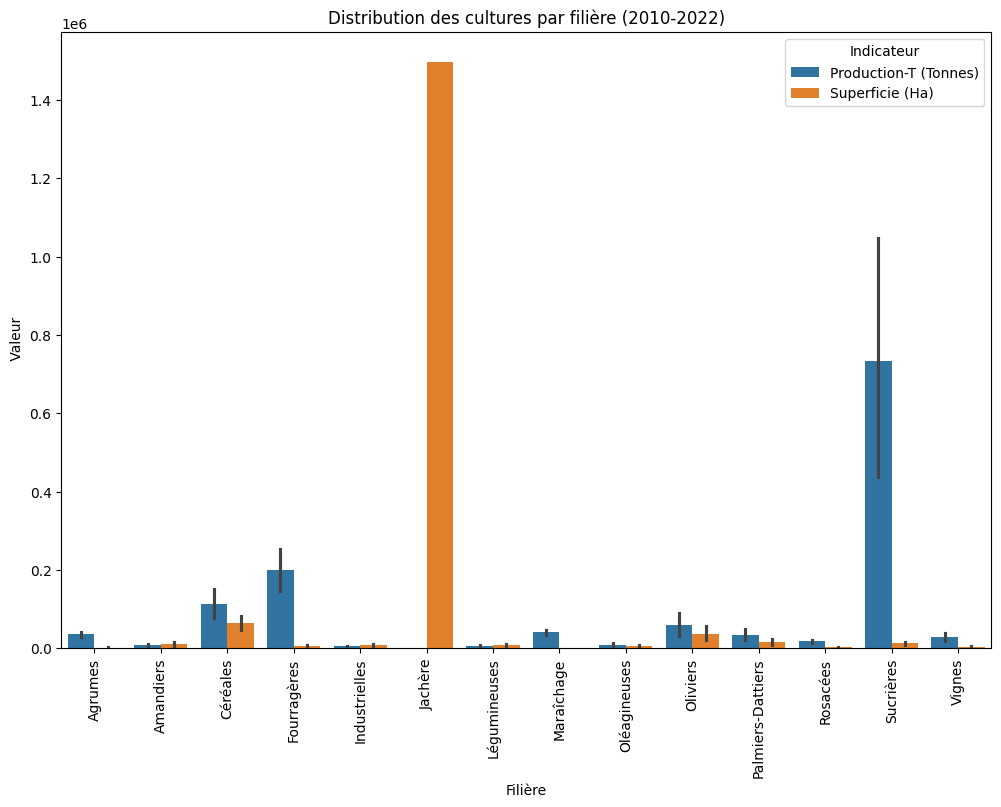

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Barres empilées
plt.figure(figsize=(12, 8))
sns.barplot(x='Filière', y=' Valeur', hue='Indicateur', data=df)
plt.title('Distribution des cultures par filière (2010-2022)')
plt.xticks(rotation=90)
plt.show()


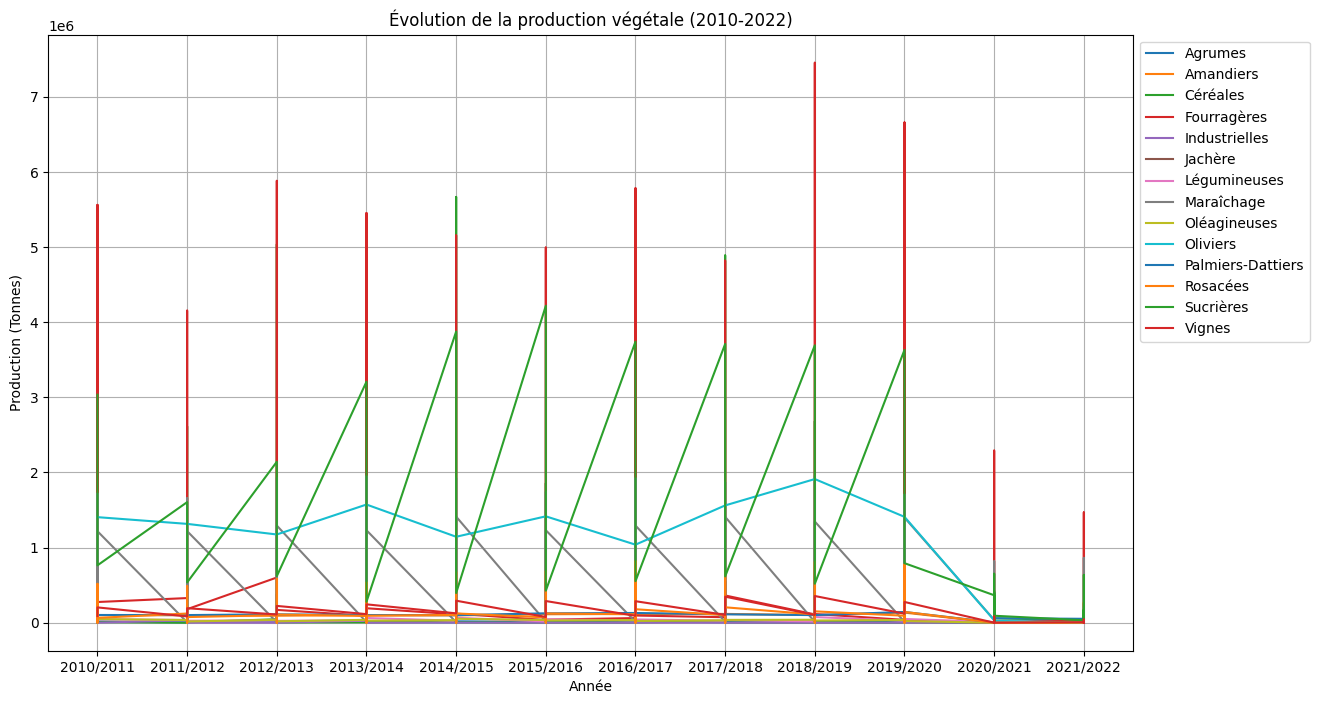

In [12]:
# Créer un graphique en ligne pour l'évolution de la production
plt.figure(figsize=(14, 8))
for filiere in df['Filière'].unique():
    temp_df = df[(df['Filière'] == filiere) & (df['Indicateur'] == 'Production-T (Tonnes)')]
    plt.plot(temp_df['Occurrence'], temp_df[' Valeur'], label=filiere)

plt.title('Évolution de la production végétale (2010-2022)')
plt.xlabel('Année')
plt.ylabel('Production (Tonnes)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


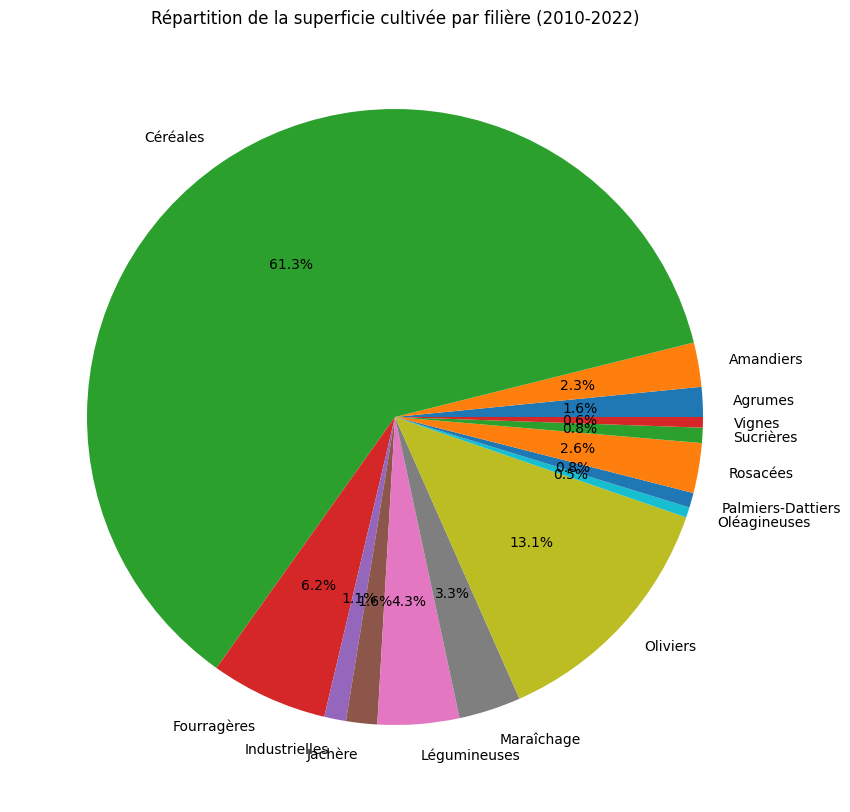

In [13]:
# Filtrer pour la superficie
df_superficie = df[df['Indicateur'] == 'Superficie (Ha)'].groupby('Filière').sum()

# Créer un diagramme en camembert
plt.figure(figsize=(20, 10))
plt.pie(df_superficie[' Valeur'], labels=df_superficie.index, autopct='%1.1f%%')
plt.title('Répartition de la superficie cultivée par filière (2010-2022)')
plt.show()


<Figure size 1400x800 with 0 Axes>

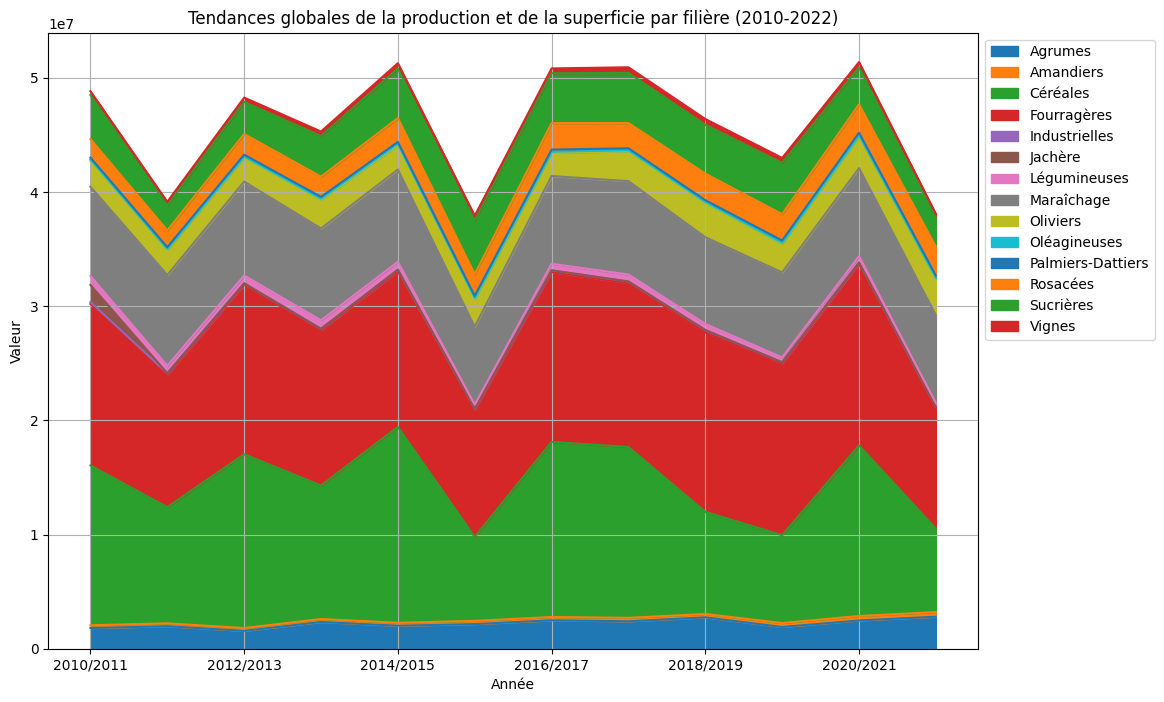

In [14]:
# Aire empilée pour visualiser la production et la superficie dans le temps
plt.figure(figsize=(14, 8))
df_pivot = df.pivot_table(index='Occurrence', columns='Filière', values=' Valeur', aggfunc='sum')
df_pivot.plot(kind='area', stacked=True, figsize=(12, 8))

plt.title('Tendances globales de la production et de la superficie par filière (2010-2022)')
plt.xlabel('Année')
plt.ylabel('Valeur')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


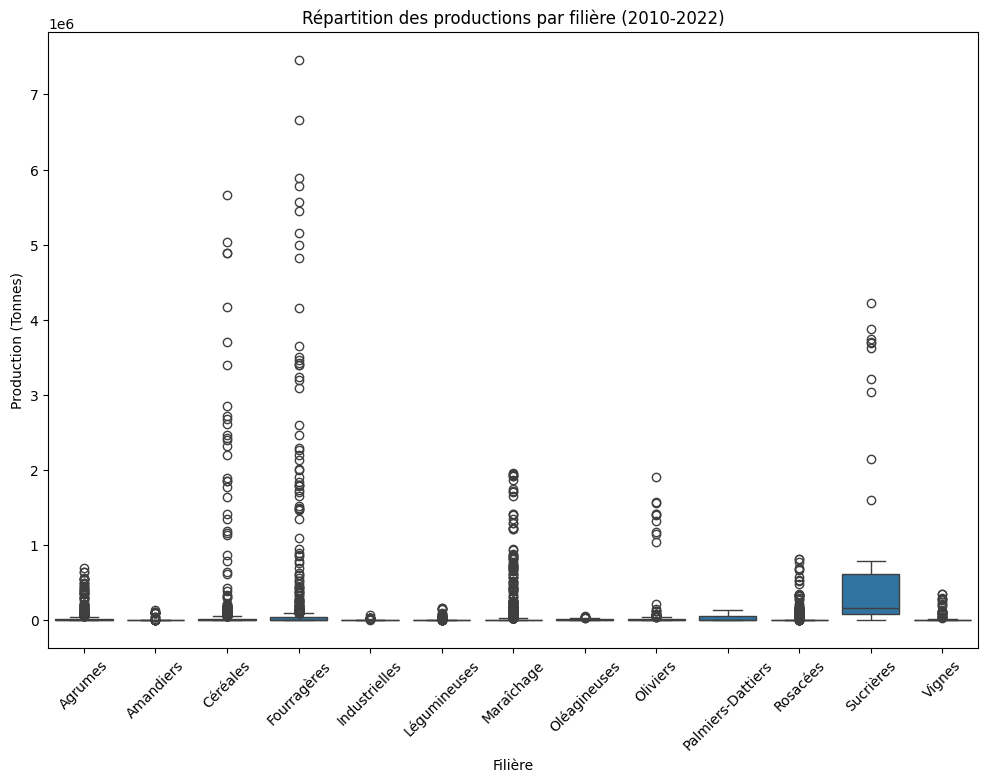

In [15]:
# Boxplot pour visualiser la répartition des productions par filière
plt.figure(figsize=(12, 8))
sns.boxplot(x='Filière', y=' Valeur', data=df[df['Indicateur'] == 'Production-T (Tonnes)'])
plt.xticks(rotation=45)
plt.title('Répartition des productions par filière (2010-2022)')
plt.ylabel('Production (Tonnes)')
plt.show()

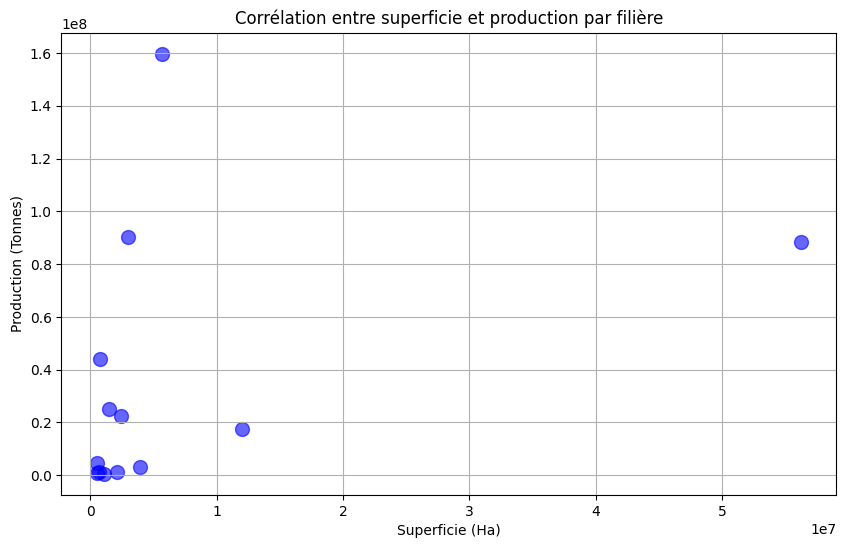

In [16]:
from scipy.stats import linregress

# Agrégation des données par filière
df_correlation = df.pivot_table(index='Filière', columns='Indicateur', values=' Valeur', aggfunc='sum')

# Nuage de points avec droite de régression
plt.figure(figsize=(10, 6))
plt.scatter(df_correlation['Superficie (Ha)'], df_correlation['Production-T (Tonnes)'], s=100, c='blue', alpha=0.6)

# Droite de régression
slope, intercept, r_value, p_value, std_err = linregress(df_correlation['Superficie (Ha)'], df_correlation['Production-T (Tonnes)'])
plt.plot(df_correlation['Superficie (Ha)'], slope * df_correlation['Superficie (Ha)'] + intercept, color='red')

plt.title('Corrélation entre superficie et production par filière')
plt.xlabel('Superficie (Ha)')
plt.ylabel('Production (Tonnes)')
plt.grid(True)
plt.show()


In [17]:
import plotly.graph_objects as go

# Créer un graphique Sankey pour montrer les flux entre indicateur et filière
labels = list(df['Indicateur'].unique()) + list(df['Filière'].unique())

# Indices des labels dans la liste
indicateur_indices = [0, 1]  # Index pour Production et Superficie
filiere_indices = list(range(2, 2 + len(df['Filière'].unique())))

# Préparation des liens (source, target, value)
source = []
target = []
value = []
for i, indicateur in enumerate(df['Indicateur'].unique()):
    for j, filiere in enumerate(df['Filière'].unique()):
        source.append(i)
        target.append(2 + j)
        valeur_totale = df[(df['Indicateur'] == indicateur) & (df['Filière'] == filiere)][' Valeur'].sum()
        value.append(valeur_totale)

# Création du Sankey
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
    )
))

fig.update_layout(title_text="Flux de production et superficie par filière", font_size=10)
fig.show()


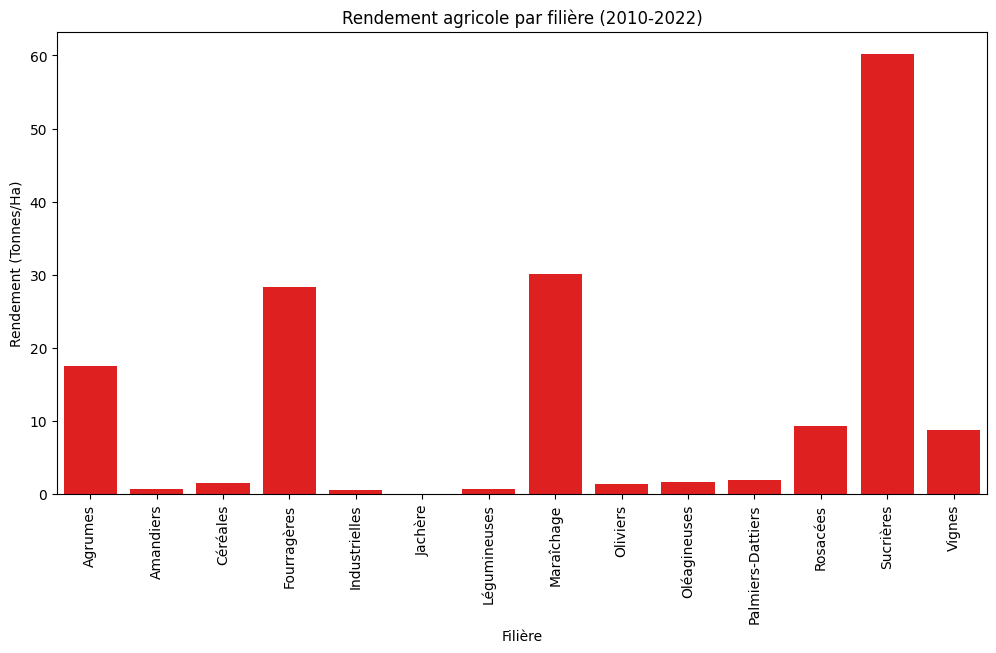

In [20]:
df_rendement = df.pivot_table(index='Filière', columns='Indicateur', values=' Valeur', aggfunc='sum')
df_rendement['Rendement (T/Ha)'] = df_rendement['Production-T (Tonnes)'] / df_rendement['Superficie (Ha)']

plt.figure(figsize=(12, 6))
sns.barplot(x=df_rendement.index, y='Rendement (T/Ha)', data=df_rendement,color="red")
plt.xticks(rotation=90)
plt.title('Rendement agricole par filière (2010-2022)')
plt.ylabel('Rendement (Tonnes/Ha)')
plt.show()


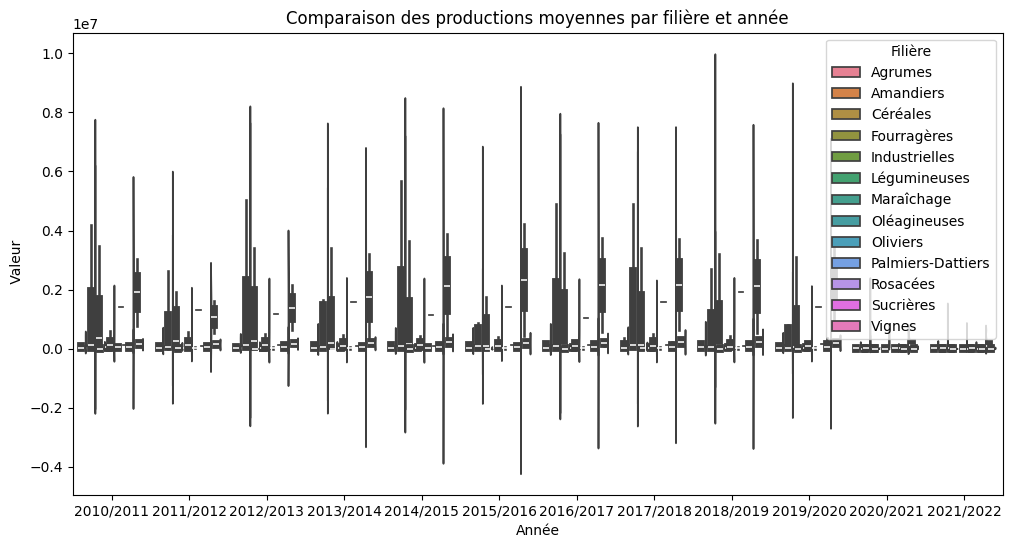

In [22]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Occurrence', y=' Valeur', hue='Filière', data=df[df['Indicateur'] == 'Production-T (Tonnes)'], split=True)
plt.title('Comparaison des productions moyennes par filière et année')
plt.xlabel('Année')
plt.show()

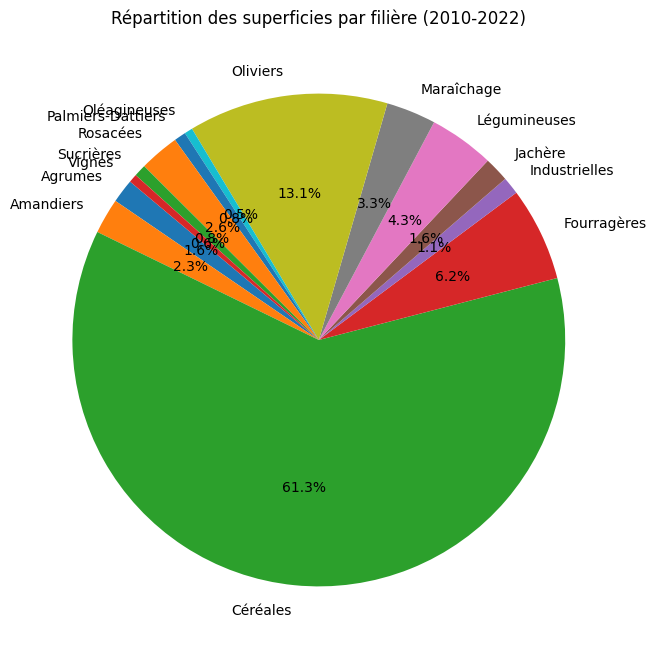

In [24]:
# Calcul de la superficie totale par filière
df_superficie = df[df['Indicateur'] == 'Superficie (Ha)'].groupby('Filière').sum().reset_index()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_superficie[' Valeur'], labels=df_superficie['Filière'], autopct='%1.1f%%', startangle=140)
plt.title('Répartition des superficies par filière (2010-2022)')
plt.show()


In [26]:
import plotly.express as px

fig = px.treemap(df_superficie, path=['Filière'], values=' Valeur', title='Répartition des superficies par filière')
fig.show()

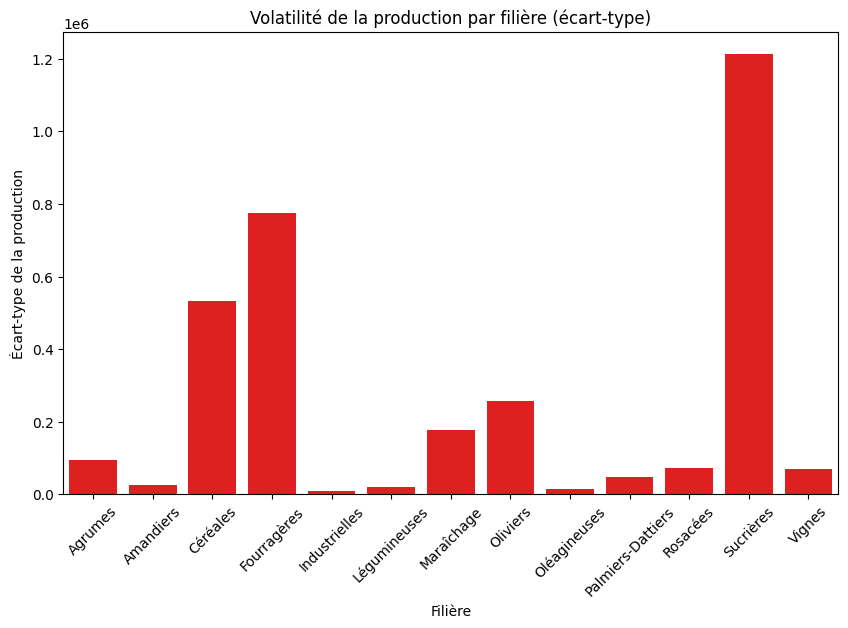

In [32]:
df_std = df[df['Indicateur'] == 'Production-T (Tonnes)'].groupby('Filière')[' Valeur'].std().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Filière', y=' Valeur', data=df_std,color="red")
plt.xticks(rotation=45)
plt.title('Volatilité de la production par filière (écart-type)')
plt.xlabel('Filière')
plt.ylabel('Écart-type de la production')
plt.show()


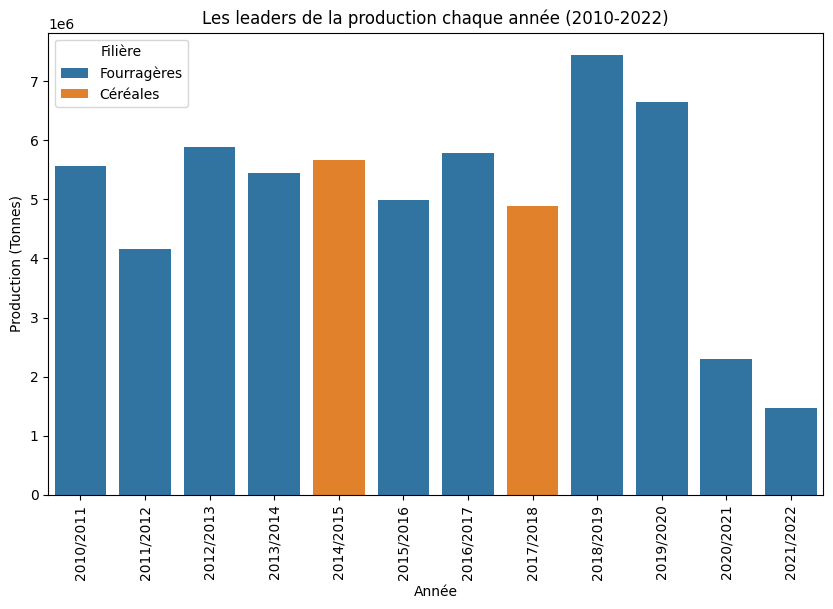

In [34]:
df_max = df[df['Indicateur'] == 'Production-T (Tonnes)'].groupby('Occurrence').apply(lambda x: x.nlargest(1, ' Valeur')).reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Occurrence', y=' Valeur', hue='Filière', data=df_max)
plt.title('Les leaders de la production chaque année (2010-2022)')
plt.xlabel('Année')
plt.ylabel('Production (Tonnes)')
plt.xticks(rotation=90)
plt.legend(title='Filière')
plt.show()


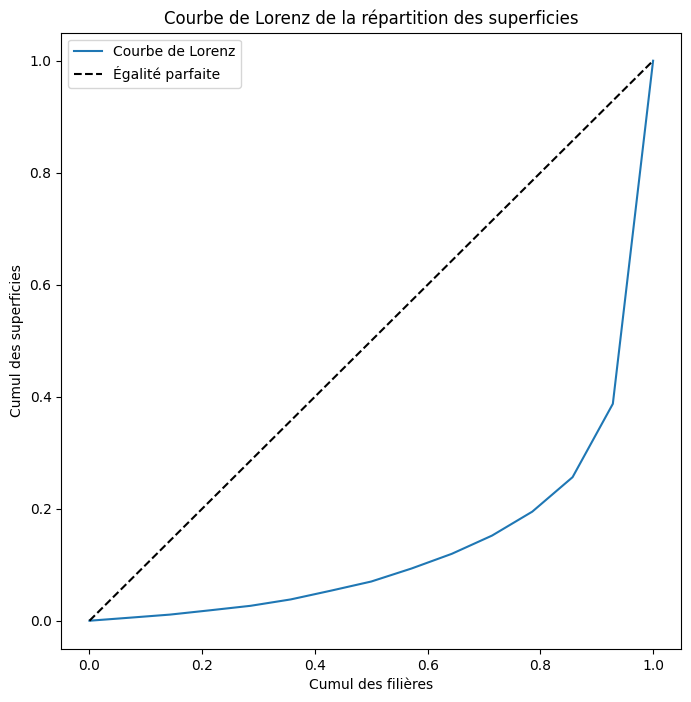

Indice de Gini: 0.7431149780916146


In [36]:
def lorenz_curve(data):
    data_sorted = np.sort(data)
    n = len(data)
    lorenz_curve = np.cumsum(data_sorted) / np.sum(data_sorted)
    lorenz_curve = np.insert(lorenz_curve, 0, 0)
    return lorenz_curve

df_superficie_total = df[df['Indicateur'] == 'Superficie (Ha)'].groupby('Filière')[' Valeur'].sum()

lorenz = lorenz_curve(df_superficie_total)

plt.figure(figsize=(8, 8))
plt.plot(np.linspace(0, 1, len(lorenz)), lorenz, label='Courbe de Lorenz')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Égalité parfaite')
plt.title("Courbe de Lorenz de la répartition des superficies")
plt.xlabel("Cumul des filières")
plt.ylabel("Cumul des superficies")
plt.legend()
plt.show()

# Calcul de l'indice de Gini
AUC = np.trapz(lorenz, dx=1/len(lorenz))  # Aire sous la courbe
Gini = 1 - 2 * AUC
print(f"Indice de Gini: {Gini}")


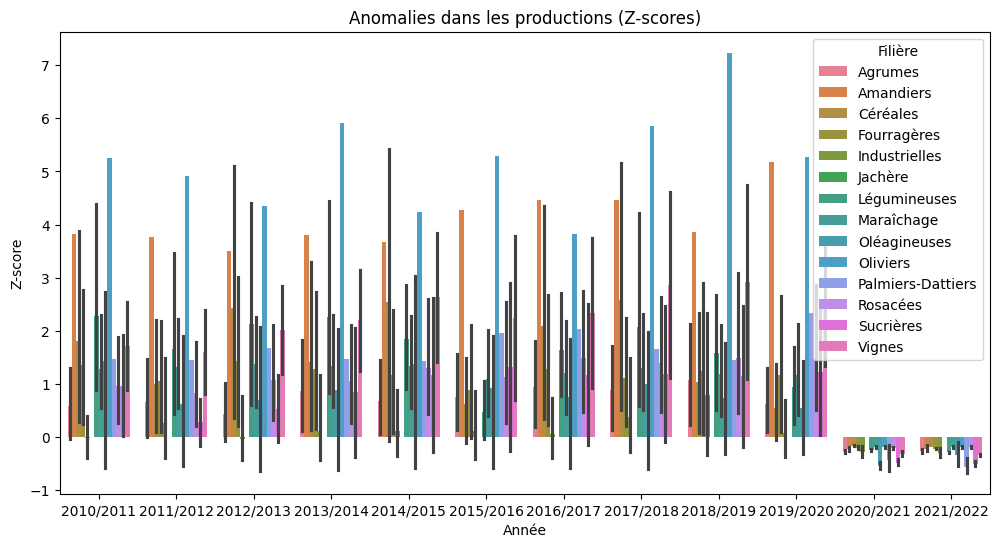

In [39]:
from scipy.stats import zscore

df['Zscore_Production'] = df[df['Indicateur'] == 'Production-T (Tonnes)'].groupby('Filière')[' Valeur'].transform(zscore)

plt.figure(figsize=(12, 6))
sns.barplot(x='Occurrence', y='Zscore_Production', hue='Filière', data=df)
plt.title('Anomalies dans les productions (Z-scores)')
plt.xlabel('Année')
plt.ylabel('Z-score')
plt.legend(title='Filière')
plt.show()


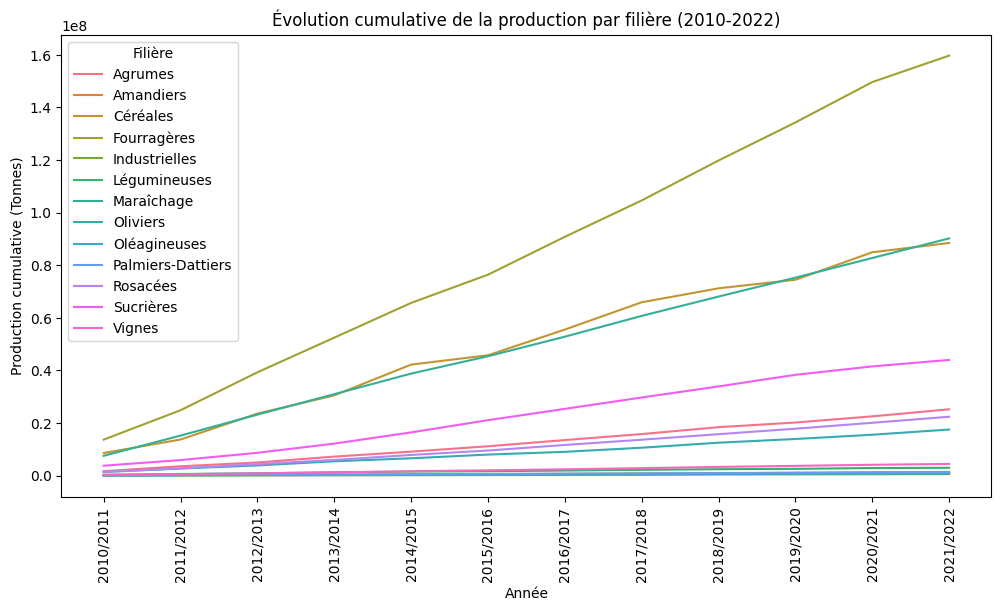

In [42]:
df_prod_cum = df[df['Indicateur'] == 'Production-T (Tonnes)'].groupby(['Occurrence', 'Filière'])[' Valeur'].sum().groupby(level=1).cumsum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Occurrence', y=' Valeur', hue='Filière', data=df_prod_cum)
plt.title('Évolution cumulative de la production par filière (2010-2022)')
plt.xlabel('Année')
plt.ylabel('Production cumulative (Tonnes)')
plt.xticks(rotation=90)
plt.show()


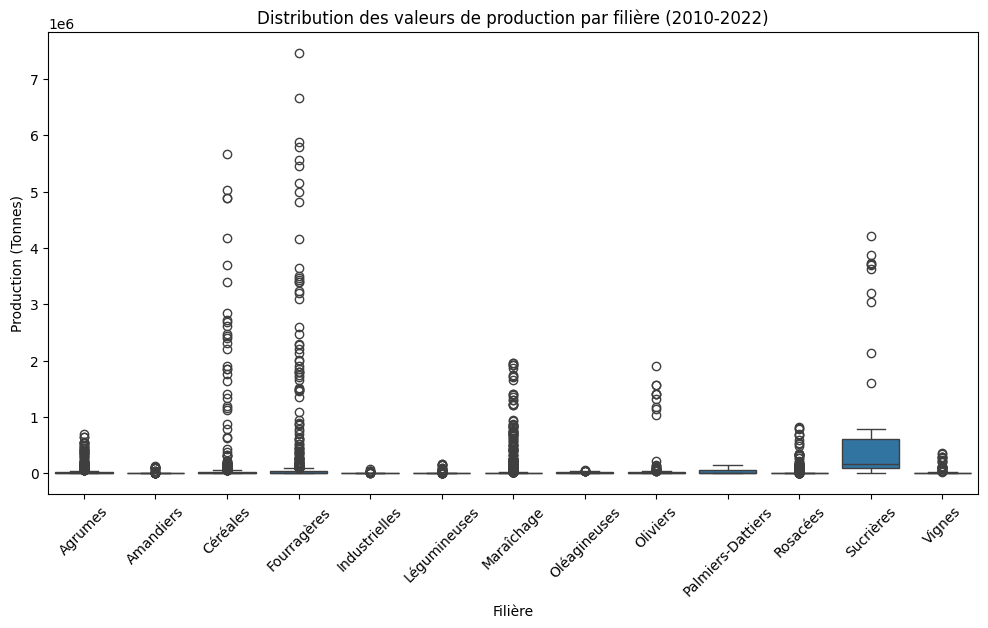

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Filière', y=' Valeur', data=df[df['Indicateur'] == 'Production-T (Tonnes)'])
plt.xticks(rotation=45)
plt.title('Distribution des valeurs de production par filière (2010-2022)')
plt.ylabel('Production (Tonnes)')
plt.show()

<ipython-input-55-796c70d268b0>:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



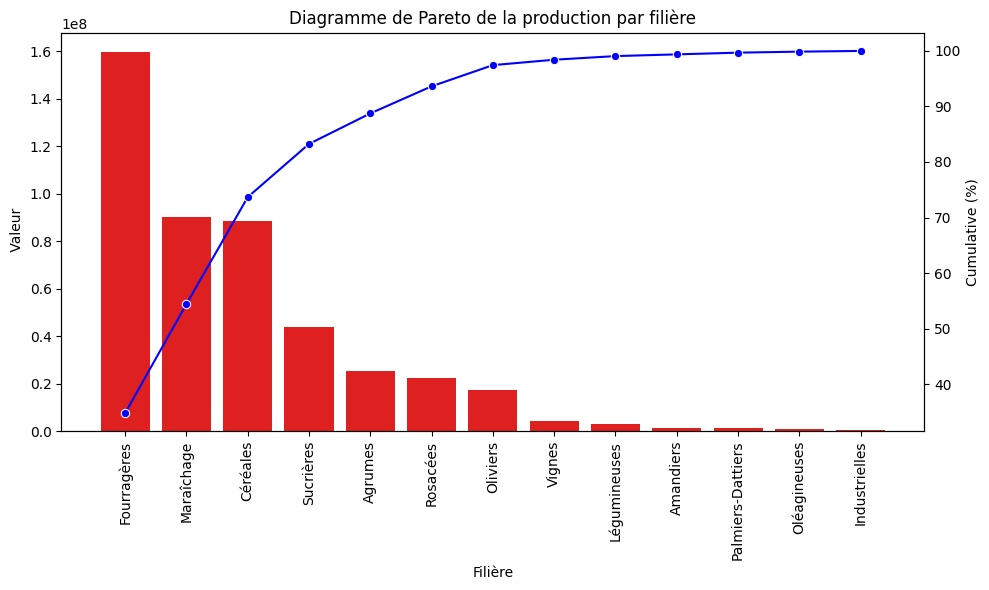

In [55]:
df_prod_total = df[df['Indicateur'] == 'Production-T (Tonnes)'].groupby('Filière')[' Valeur'].sum().sort_values(ascending=False).reset_index()

df_prod_total['Cumulative'] = df_prod_total[' Valeur'].cumsum() / df_prod_total[' Valeur'].sum() * 100

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Filière', y=' Valeur', data=df_prod_total, color='r', ax=ax)

# Créer un deuxième axe Y pour la courbe cumulative
ax2 = ax.twinx()
sns.lineplot(x='Filière', y='Cumulative', data=df_prod_total, color='b', ax=ax2, marker='o')

# Ajuster les labels et les axes
ax2.set_ylabel('Cumulative (%)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.title('Diagramme de Pareto de la production par filière')
plt.tight_layout()  # Pour éviter le chevauchement des éléments
plt.show()


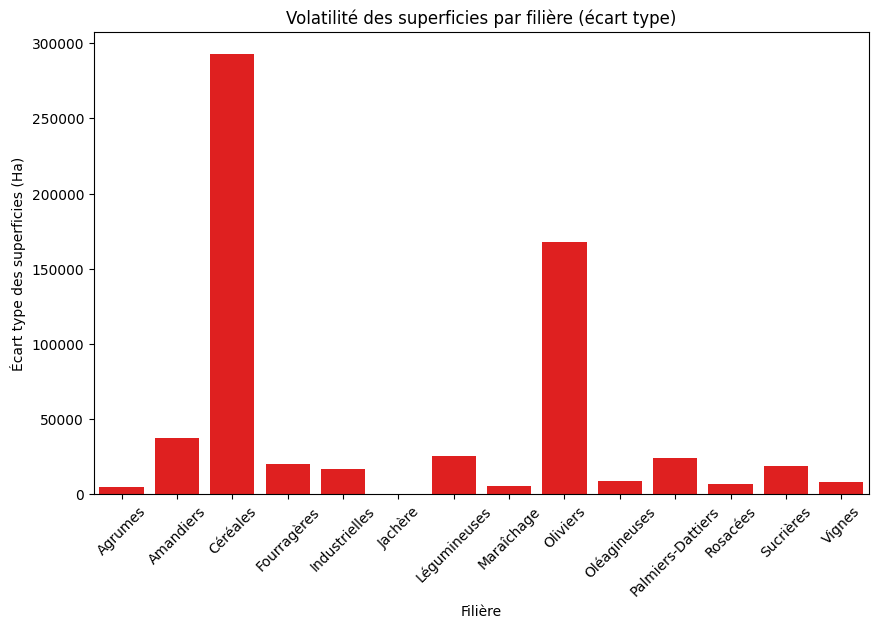

In [52]:
df_std_superficie = df[df['Indicateur'] == 'Superficie (Ha)'].groupby('Filière')[' Valeur'].std().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Filière', y=' Valeur', data=df_std_superficie,color="red")
plt.xticks(rotation=45)
plt.title('Volatilité des superficies par filière (écart type)')
plt.xlabel('Filière')
plt.ylabel('Écart type des superficies (Ha)')
plt.show()
